!pip install opencv-python 

In [45]:
import numpy as np
import pandas as pd

In [46]:
import os
print(os.listdir("./fruits-360/Training"))

['Apple 10', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Banana 1', 'Cherry 1', 'Lemon 1', 'Tomato 1', 'Watermelon 1']


In [47]:
import numpy as np
import cv2
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans

In [48]:
fruit_images = []
labels = [] 
for fruit_dir_path in glob.glob("./fruits-360/Training/*"):
    fruit_label = fruit_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        fruit_images.append(image)
        labels.append(fruit_label)
fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [49]:
print(labels)

['Training\\Apple 10' 'Training\\Apple 10' 'Training\\Apple 10' ...
 'Training\\Watermelon 1' 'Training\\Watermelon 1'
 'Training\\Watermelon 1']


In [50]:
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}

In [51]:
id_to_label_dict

{0: 'Training\\Apple 10',
 1: 'Training\\Apple 5',
 2: 'Training\\Apple 6',
 3: 'Training\\Apple 7',
 4: 'Training\\Apple 8',
 5: 'Training\\Apple 9',
 6: 'Training\\Banana 1',
 7: 'Training\\Cherry 1',
 8: 'Training\\Lemon 1',
 9: 'Training\\Tomato 1',
 10: 'Training\\Watermelon 1'}

In [52]:
label_ids = np.array([label_to_id_dict[x] for x in labels])

In [53]:
def plot_image_grid(images, rows, columns):
    figure = plt.figure(figsize=(columns * 3, rows * 3))
    for i in range(columns * rows):
        figure.add_subplot(rows, columns, i + 1)
        plt.imshow(images[i])
    plt.show()

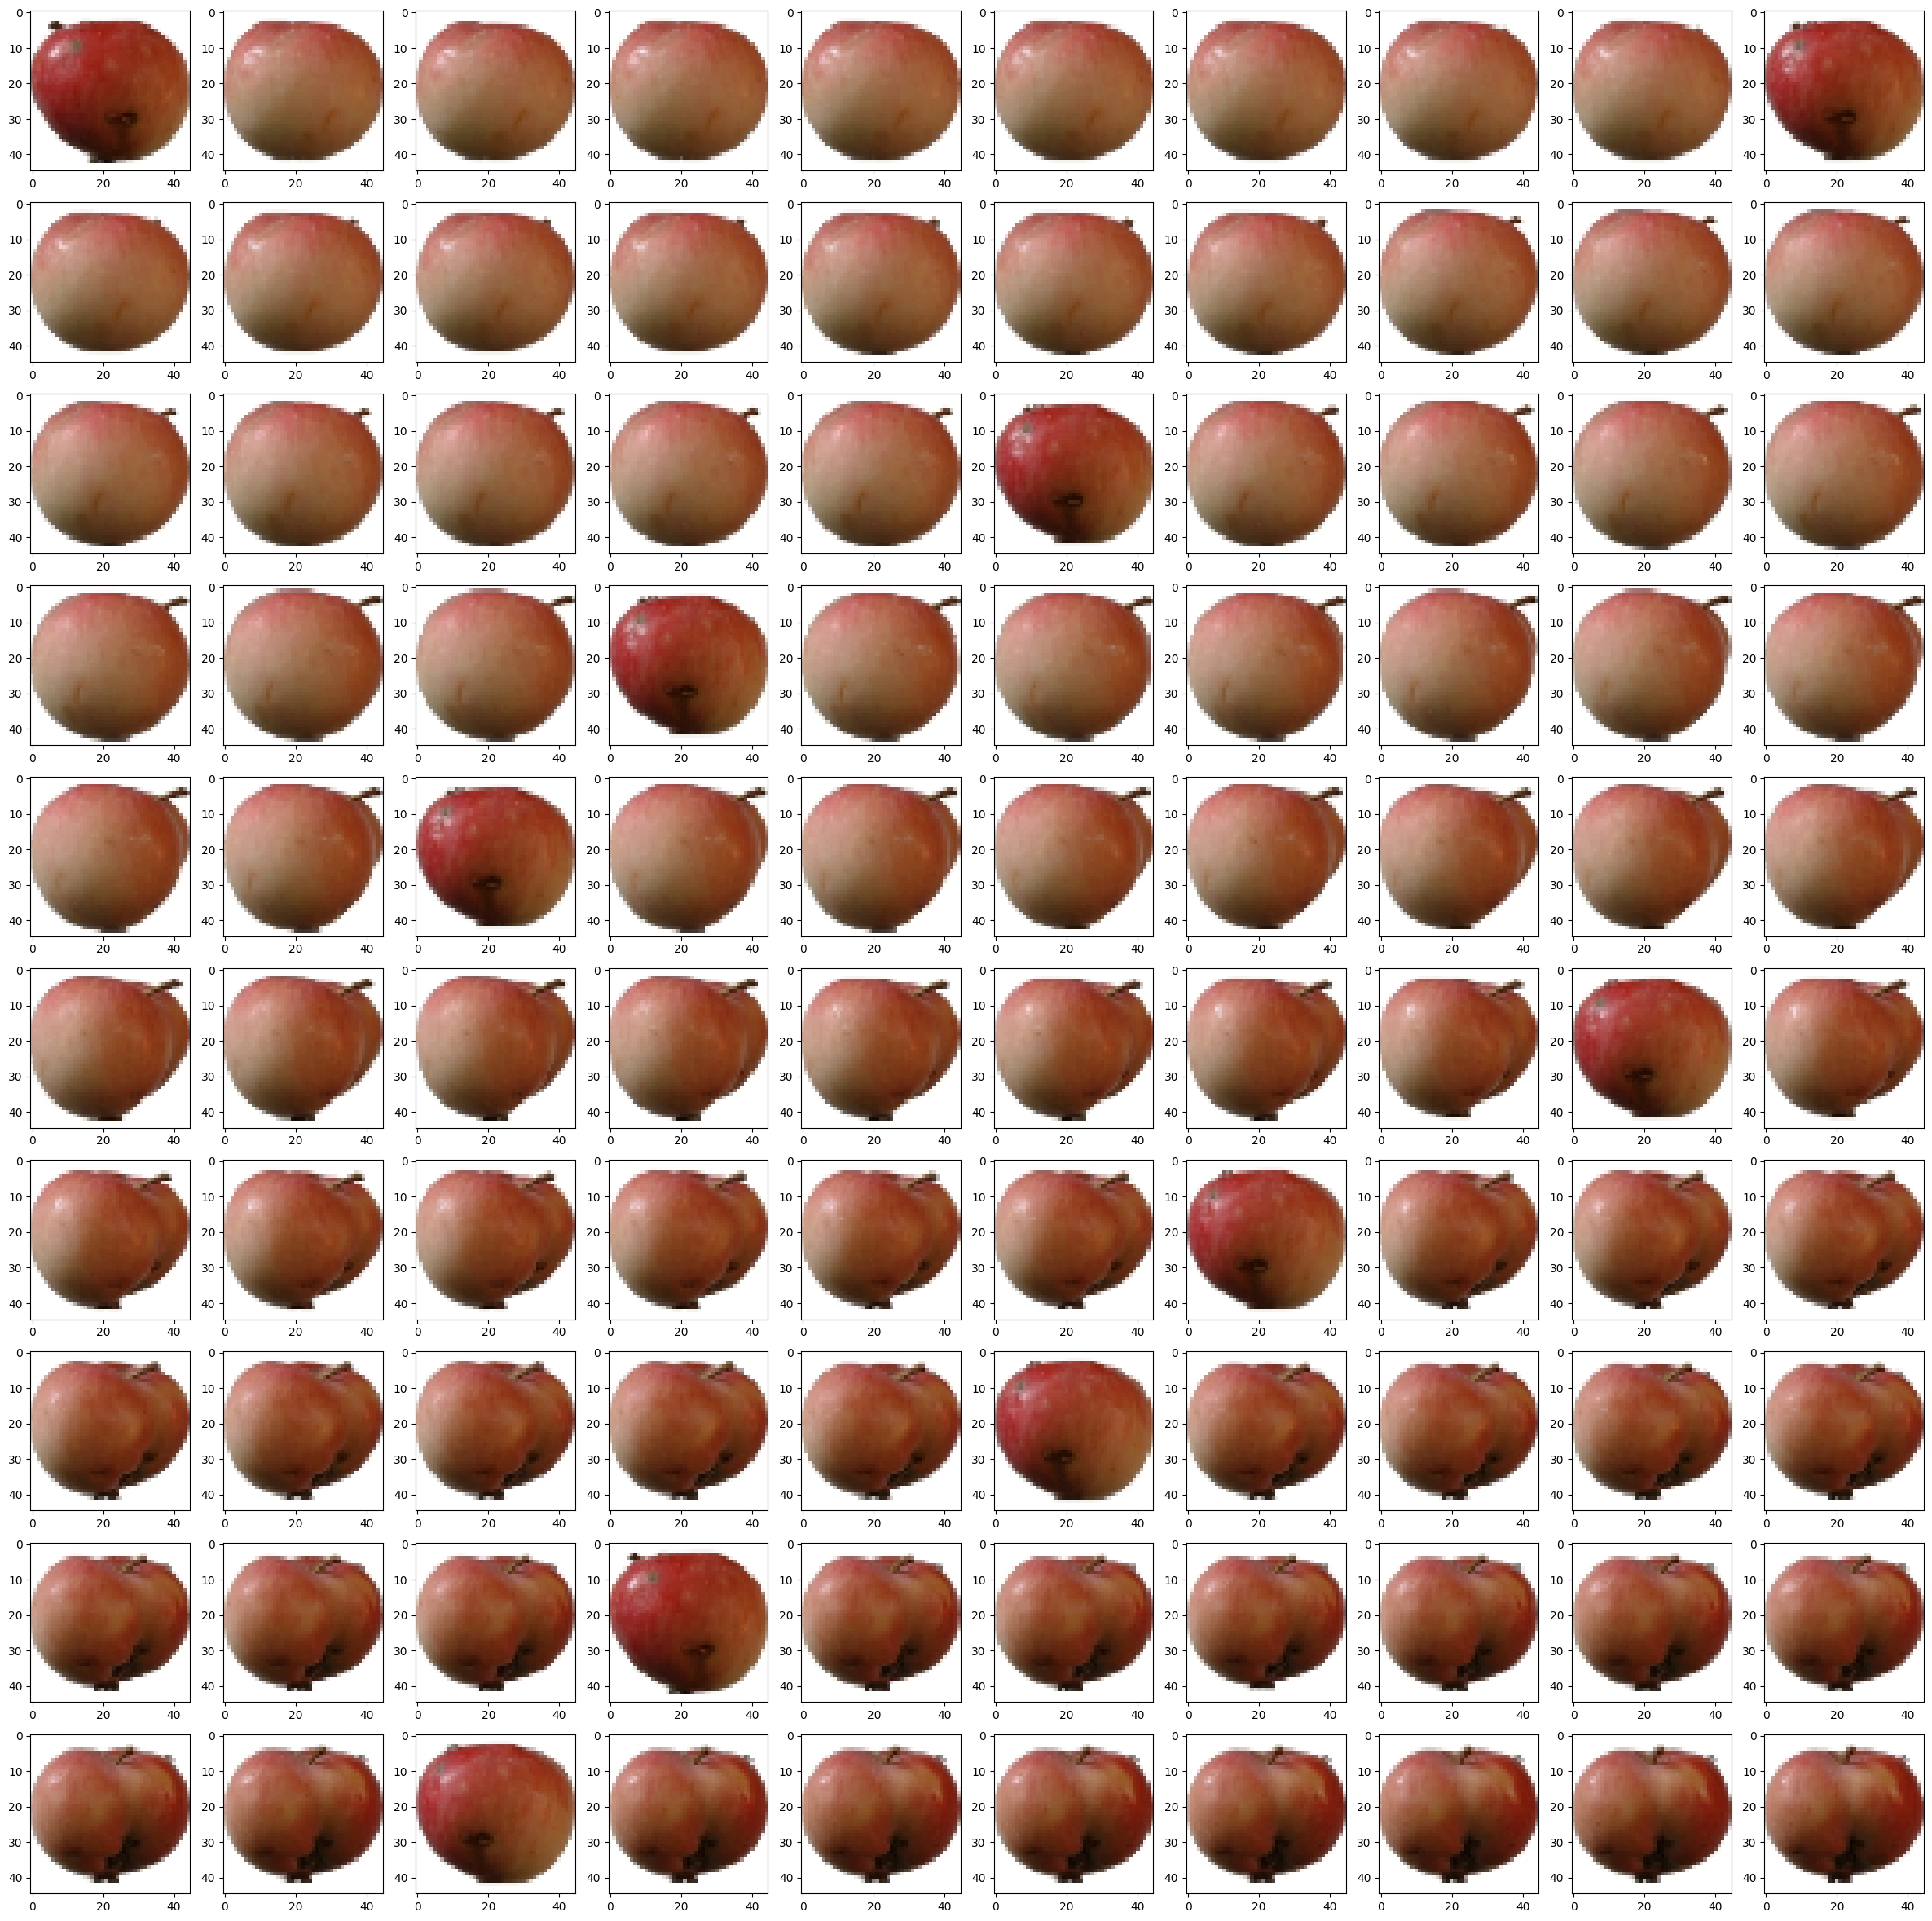

In [54]:
plot_image_grid(fruit_images[0:100], 10, 10)

In [55]:
scaler = StandardScaler()

In [56]:
images_scaled = scaler.fit_transform([i.flatten() for i in fruit_images])

In [57]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(images_scaled)

In [58]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(pca_result)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

In [59]:
tsnedf = pd.DataFrame()
tsnedf['x'] = list(tsne_result_scaled[:,0])
tsnedf['y'] = list(tsne_result_scaled[:,1])
tsnedf['label'] = labels
tsnedf.head()

,x,y,label
0,-0.187147,0.004328,Training\Apple 10
1,0.067113,-0.009034,Training\Apple 10
2,0.065790,0.009887,Training\Apple 10
3,0.071338,-0.006240,Training\Apple 10
4,0.070961,-0.005825,Training\Apple 10


In [60]:

nb_classes = len(np.unique(label_ids))
sns.set_style('white')
#120 for 120 fruits, so 120 different colors
cmap = plt.cm.get_cmap("Spectral", 120) 

plt.figure(figsize=(20,20))
for i, label_id in enumerate(np.unique(label_ids)):
    
    #plot matching labels to tsne results so labels are accurate
    plt.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],
                tsne_result_scaled[np.where(label_ids == label_id), 1],
                marker = '.',
                c = cmap(i),
                linewidth = '5',
                alpha=0.8,
                label = id_to_label_dict[label_id])
plt.title('T-SNE Plot (PCA 50 Components)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 2)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_11968\3603746151.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Spectral", 120)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11968\3603746151.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne_result_scaled[np.where(label_ids == label_id), 0],


RuntimeError: Unable to cast Python instance of type <class 'tuple'> to C++ type '?' (#define PYBIND11_DETAILED_ERROR_MESSAGES or compile in debug mode for details)

<Figure size 2000x2000 with 1 Axes>

In [61]:
import seaborn as sns

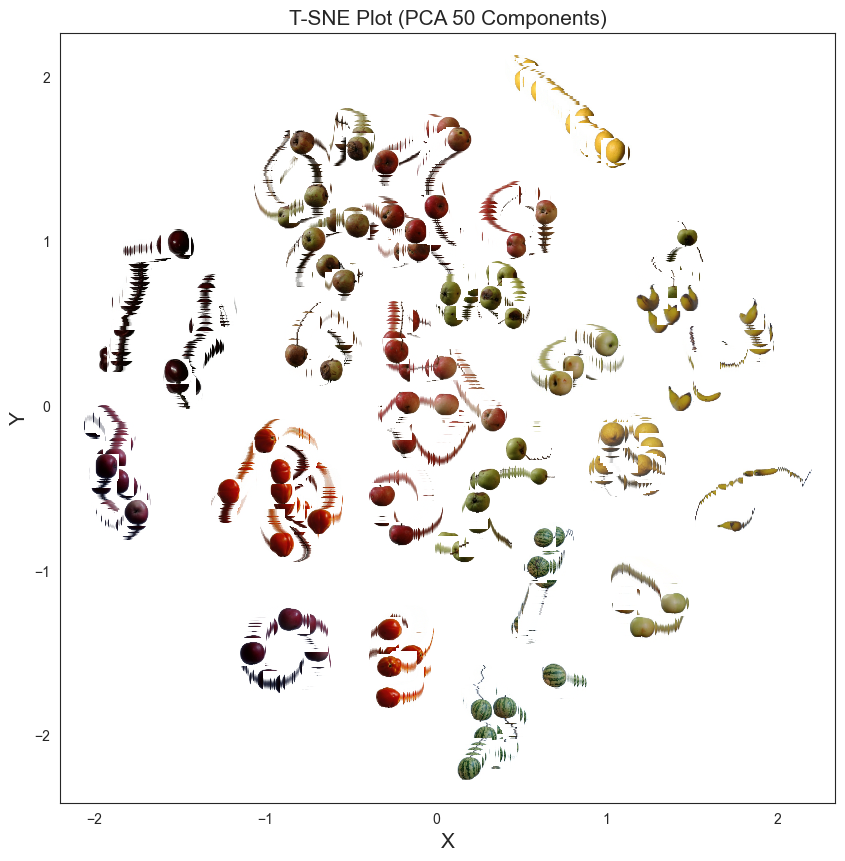

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
for df, i in zip(tsnedf.iterrows(), fruit_images):
    x = df[1]['x']
    y = df[1]['y']
    img = OffsetImage(i, zoom = .4)
    ab = AnnotationBbox(img, (x,y), xycoords = 'data', frameon = False)
    ax.add_artist(ab)
ax.update_datalim(tsnedf[['x', 'y']].values)
ax.autoscale()
plt.title('T-SNE Plot (PCA 50 Components)', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(pca_result, label_ids, test_size=0.25, random_state=42)

> Sử dụng mô hình RandomForestClassifier

In [64]:
forest = RandomForestClassifier(n_estimators=10)
forest = forest.fit(X_train, y_train)

In [65]:
test_predictions = forest.predict(X_test)

In [66]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

Accuracy with RandomForest: 99.938650


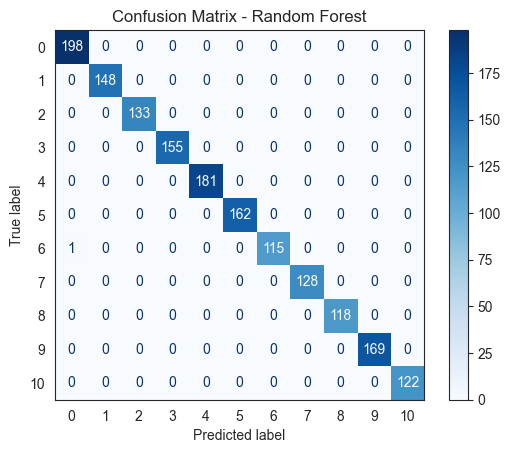

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()


Accuracy with RandomForest: 99.938650


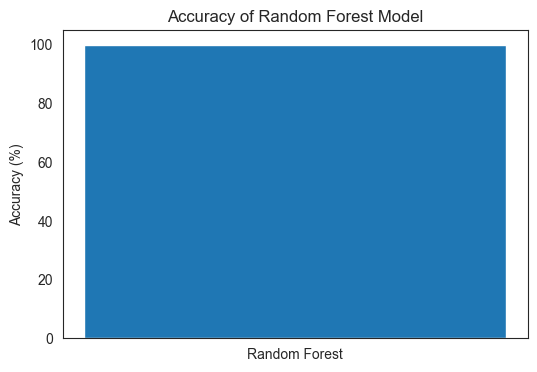

In [68]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Tính toán độ chính xác
precision = accuracy_score(y_test, test_predictions) * 100
print("Accuracy with RandomForest: {0:.6f}".format(precision))

# Vẽ biểu đồ Accuracy
plt.figure(figsize=(6, 4))
plt.bar(["Random Forest"], [precision])
plt.title("Accuracy of Random Forest Model")
plt.ylabel("Accuracy (%)")
plt.show()


> Mô hình SVC

In [69]:
svm_clf = svm.SVC()
svm_clf = svm_clf.fit(X_train, y_train)

In [70]:
test_predictions = svm_clf.predict(X_test)

In [71]:
precision = accuracy_score(test_predictions, y_test) * 100
print("Accuracy with SVM: {0:.6f}".format(precision))

Accuracy with SVM: 100.000000


In [72]:

# Bước 1: Đọc ảnh và nhãn từ thư mục Test
validation_fruit_images = []
validation_labels = [] 

for fruit_dir_path in glob.glob("./fruits-360/Test/*"):
    fruit_label = os.path.basename(fruit_dir_path)
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

# Bước 2: In thử label
print("Một số nhãn ví dụ:", validation_labels[:10])
print("Tổng số ảnh:", len(validation_labels))

# Bước 3: Tạo label_to_id_dict từ chính validation_labels (nếu chỉ dùng tập Test)
unique_labels = np.unique(validation_labels)
label_to_id_dict = {label: idx for idx, label in enumerate(unique_labels)}

# Bước 4: Gán ID
validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])


Một số nhãn ví dụ: ['Apple 10' 'Apple 10' 'Apple 10' 'Apple 10' 'Apple 10' 'Apple 10'
 'Apple 10' 'Apple 10' 'Apple 10' 'Apple 10']
Tổng số ảnh: 2119


In [73]:
validation_fruit_images = []
validation_labels = [] 

for fruit_dir_path in glob.glob("./fruits-360/Test/*"):
    fruit_label = os.path.basename(fruit_dir_path) 
    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (45, 45))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        validation_fruit_images.append(image)
        validation_labels.append(fruit_label)

validation_fruit_images = np.array(validation_fruit_images)
validation_labels = np.array(validation_labels)

In [74]:
print(validation_labels)

['Apple 10' 'Apple 10' 'Apple 10' ... 'Watermelon 1' 'Watermelon 1'
 'Watermelon 1']


In [75]:
validation_label_ids = np.array([label_to_id_dict[x] for x in validation_labels])

In [76]:
validation_images_scaled = scaler.transform([i.flatten() for i in validation_fruit_images])

In [77]:
validation_pca_result = pca.transform(validation_images_scaled)

In [78]:
test_predictionsRF = forest.predict(validation_pca_result)

In [79]:
precisionRF = accuracy_score(test_predictionsRF, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precisionRF))

Validation Accuracy with Random Forest: 98.820198


In [80]:
test_predictionsSVM = svm_clf.predict(validation_pca_result)

In [81]:
precisionSVM = accuracy_score(test_predictionsSVM, validation_label_ids) * 100
print("Validation Accuracy with SVM: {0:.6f}".format(precisionSVM))

Validation Accuracy with SVM: 100.000000


> So sánh mô hình (accuracy)

In [82]:
precision_Random_Forest = accuracy_score(test_predictionsRF, validation_label_ids) * 100
print("Validation Accuracy with Random Forest: {0:.6f}".format(precision_Random_Forest))

precision_SVM = accuracy_score(test_predictionsSVM, validation_label_ids) * 100
print("Validation Accuracy with SVM: {0:.6f}".format(precision_SVM))


Validation Accuracy with Random Forest: 98.820198
Validation Accuracy with SVM: 100.000000


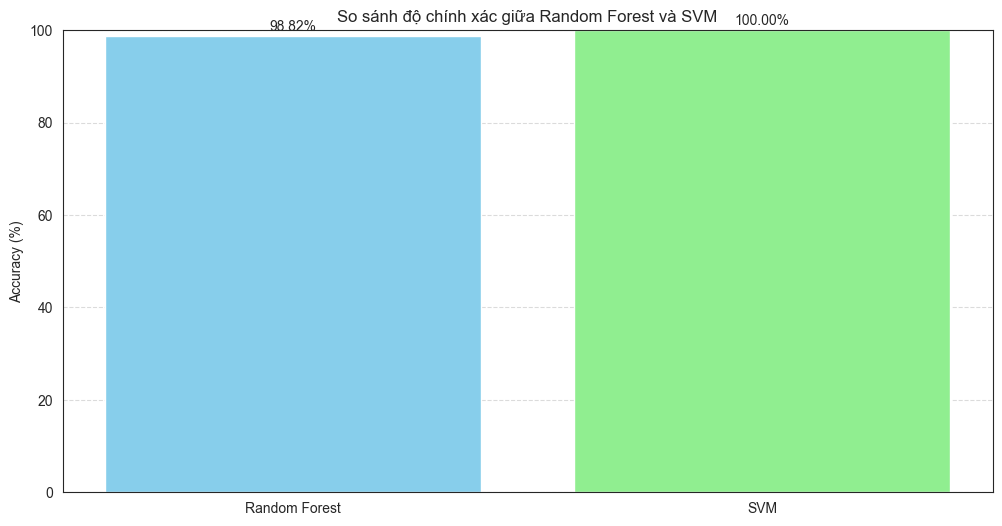

In [83]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'SVM']
accuracies = [precision_Random_Forest, precision_SVM]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom')

plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('So sánh độ chính xác giữa Random Forest và SVM')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [84]:
import numpy as np
import joblib

label_to_id_dict = {v: i for i, v in enumerate(np.unique(labels))}
id_to_label_dict = {v: k for k, v in label_to_id_dict.items()}


joblib.dump(id_to_label_dict, "id_to_label_dict.pkl")
joblib.dump(forest, 'random_forest_model.pkl')
joblib.dump(svm_clf, 'svm_model.pkl')
joblib.dump(scaler, 'scaler.pkl') 
joblib.dump(pca, "pca.pkl")


['pca.pkl']

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3948 - loss: 1.5957 - val_accuracy: 0.9505 - val_loss: 0.1915
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9373 - loss: 0.1856 - val_accuracy: 0.9858 - val_loss: 0.0604
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9796 - loss: 0.0840 - val_accuracy: 0.9410 - val_loss: 0.1354
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9755 - loss: 0.0785 - val_accuracy: 0.9976 - val_loss: 0.0190
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0109
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9998 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9931 - loss: 0.0260 - val_accuracy: 0.9363 - v

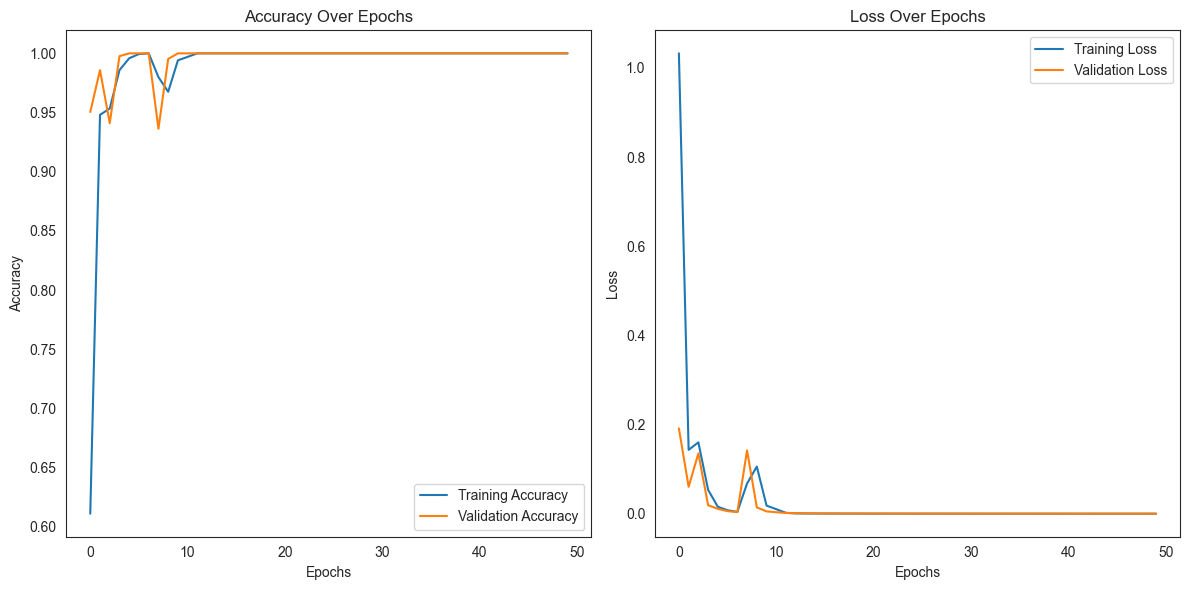

In [85]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Giả sử validation_fruit_images và validation_label_ids đã được định nghĩa như bạn đã làm trước đó

# Bước 1: Tiền xử lý dữ liệu
validation_fruit_images = validation_fruit_images / 255.0  # Chuẩn hóa giá trị pixel từ 0-255 về 0-1

# Chia tập validation thành validation và testing (nếu cần thiết)
X_train, X_test, y_train, y_test = train_test_split(validation_fruit_images, validation_label_ids, test_size=0.2, random_state=42)

# Bước 2: Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(45, 45, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(validation_labels)), activation='softmax')  # Output layer, number of classes
])

# Bước 3: Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Bước 4: Huấn luyện mô hình với theo dõi accuracy và loss
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Bước 5: Vẽ biểu đồ accuracy và loss
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


> Những gì đã làm:
- Đọc và resize dữ liệu hình ảnh từ thư mục Training và Test.
- Gán nhãn và mã hóa nhãn thành số (label_to_id_dict).
- Trực quan hóa dữ liệu bằng T-SNE.
- Trích xuất đặc trưng ảnh (flatten ảnh và chuẩn hóa).
- Dùng PCA để giảm chiều dữ liệu.
- Huấn luyện mô hình (Random Forest, SVM).
- Đánh giá độ chính xác (accuracy_score) của từng mô hình.